In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
raw_df = pd.read_csv('Fraud.csv')

In [5]:
raw_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [6]:
raw_df.shape

(83561, 11)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83561 entries, 0 to 83560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83561 non-null  int64  
 1   type            83561 non-null  object 
 2   amount          83561 non-null  float64
 3   nameOrig        83561 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
 10  isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.0+ MB


In [8]:
raw_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

## Data Cleaning

In [9]:
raw_df.dropna(axis = 0, inplace = True)

In [10]:
raw_df.shape

(83560, 11)

In [11]:
raw_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [12]:
raw_df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [13]:
raw_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [14]:
type = pd.get_dummies(raw_df.type)

In [15]:
new_df = pd.concat([raw_df, type],  axis = 1)

In [16]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0,0,0,1,0


In [17]:
new_df.drop('type', axis = 1, inplace = True)

In [18]:
new_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0,0,0,1,0


## Visualization

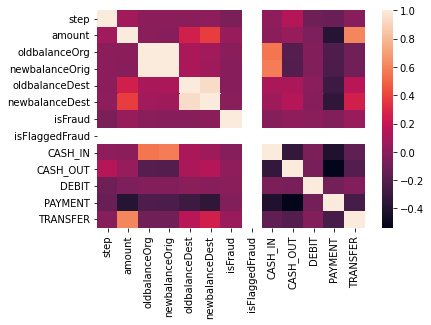

In [19]:
sns.heatmap(new_df.corr())

In [20]:
new_df.isFlaggedFraud.unique()

array([0.])

In [21]:
new_df.drop('isFlaggedFraud', axis = 1, inplace = True)

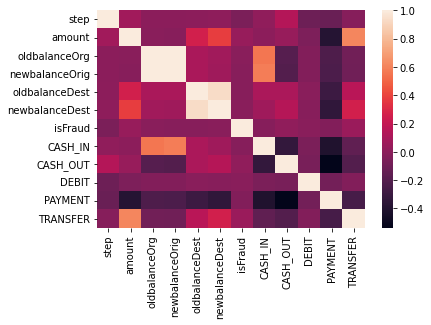

In [22]:
sns.heatmap(new_df.corr())

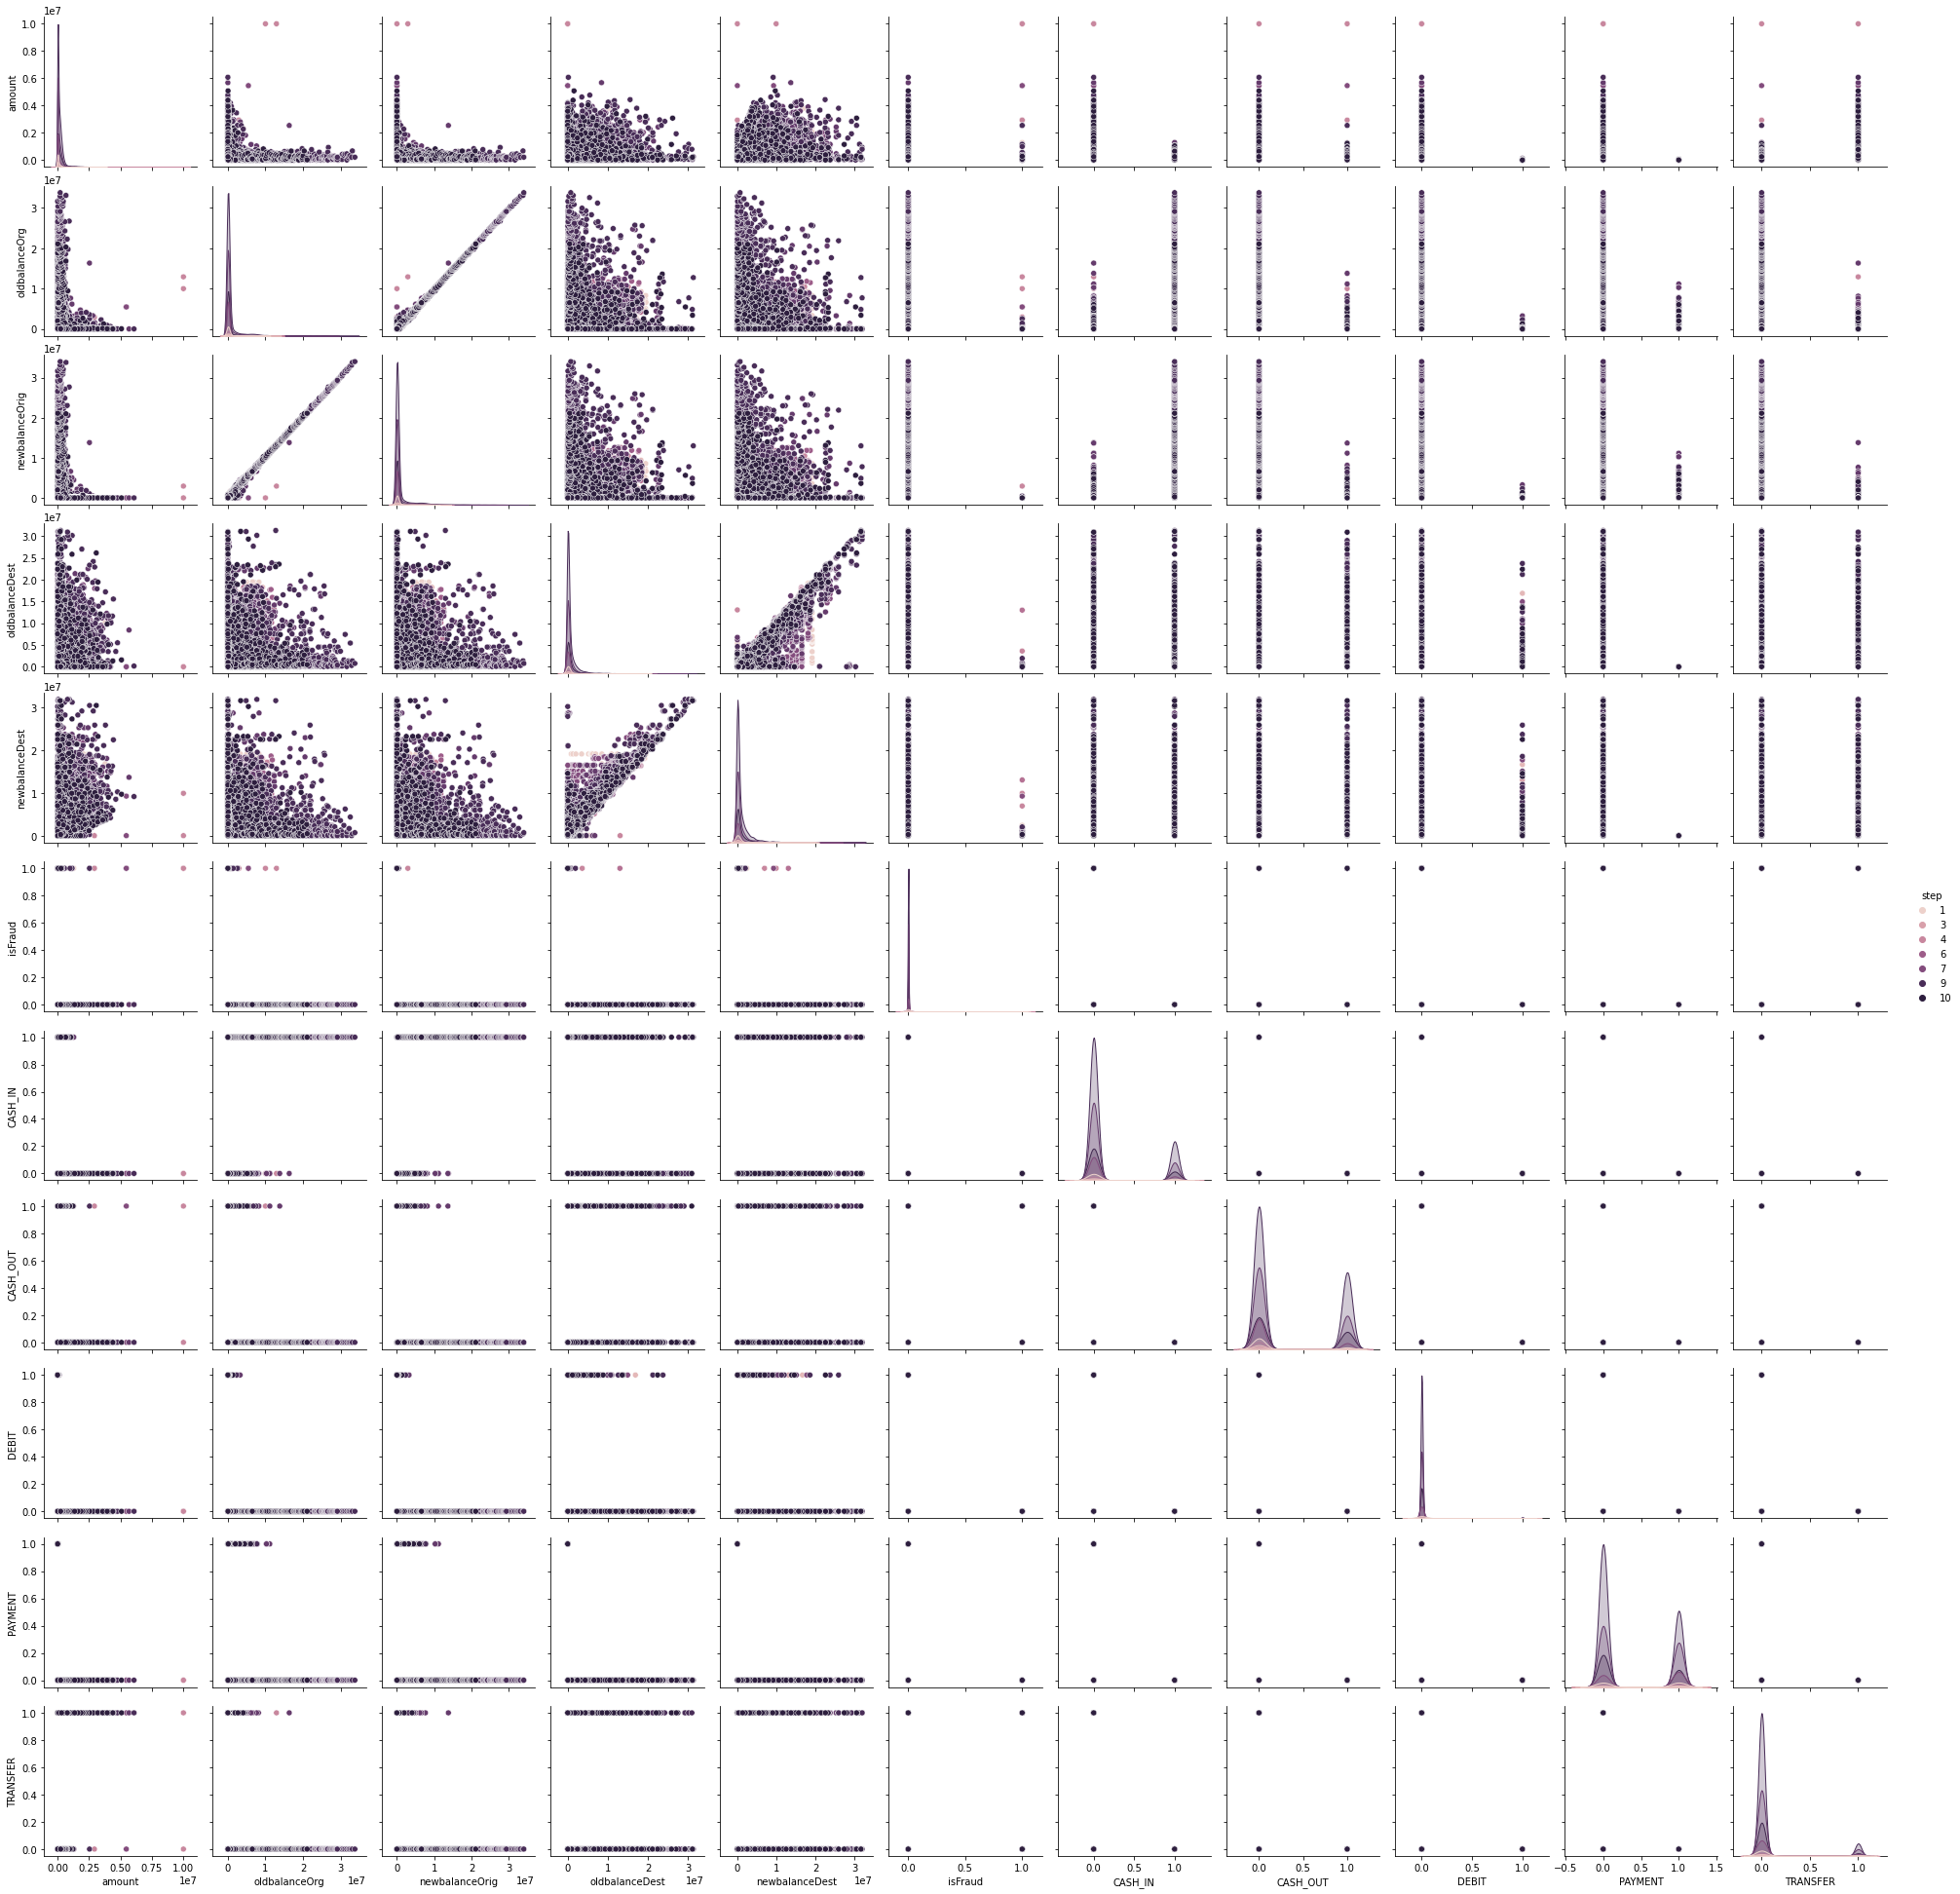

In [23]:
sns.pairplot(new_df, hue = 'step')

## Model Building

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = new_df.drop('isFraud', axis = 1)
y = new_df['isFraud']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [38]:
model_lr = LogisticRegression()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {'penalty': ['l2', 'l2', 'elasticnet'], 'C':[1,2,3,4,5,8,10,20,30,40,50], 'max_iter':[100,200,300]}

In [39]:
model_lr_new = GridSearchCV(model_lr, param_grid = parameters, scoring = 'accuracy', cv = 5)

In [40]:
model_lr_new.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 8, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', 'l2', 'elasticnet']},
             scoring='accuracy')

In [41]:
model_lr_new.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [42]:
model_lr_new.best_score_

0.998818209531836

In [93]:
y_pred = model_lr_new.predict(x_test)

In [94]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [95]:
from sklearn.metrics import accuracy_score, classification_report

In [96]:
lr_score = accuracy_score(y_test, y_pred)

In [97]:
print("accuracy of logistic regression model is " + str(score*100) + " %" )

accuracy of logistic regression model is 99.86835806606031 %


In [92]:
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00     16693\n         1.0       1.00      0.53      0.69        19\n\n    accuracy                           1.00     16712\n   macro avg       1.00      0.76      0.84     16712\nweighted avg       1.00      1.00      1.00     16712\n'

### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model_dt = DecisionTreeClassifier(random_state=42)

In [56]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [80]:
y_pred = model_dt.predict(x_test)

In [81]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
model_dt.score(x_test, y_test)

0.9990426041168023

In [83]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16686,     7],
       [    9,    10]])

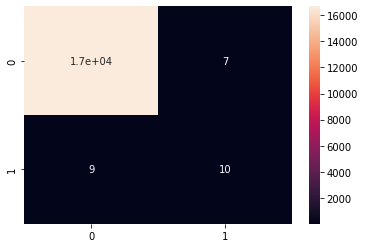

In [84]:
sns.heatmap(cm, annot = True)

In [68]:
print("accuracy of decision tree model is " + str(model_dt.score(x_test, y_test)*100) + " %")

accuracy of decision tree model is 99.90426041168024 %


In [69]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model_dt.feature_importances_
}).sort_values('importance', ascending=False)

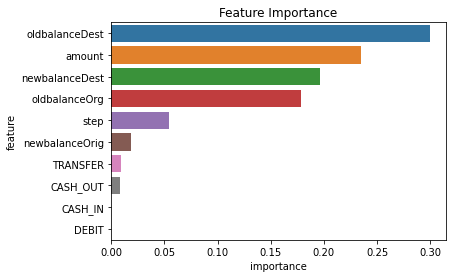

In [72]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [75]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [76]:
model_rf.score(x_test, y_test)

0.9994614648157013

In [85]:
y_pred = model_rf.predict(x_test)

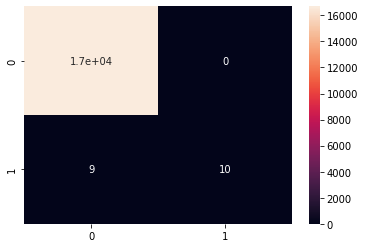

In [86]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [87]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

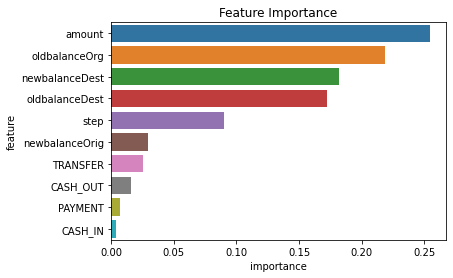

In [88]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [89]:
print("accuracy of Random Forest model is " + str(model_rf.score(x_test, y_test)*100) + " %")

accuracy of Random Forest model is 99.94614648157012 %


In [99]:
data = [['Logistic Regression', lr_score], ['Decision Tree', model_dt.score(x_test, y_test)], ['Random Forest', model_rf.score(x_test, y_test)]]

In [103]:
score_df = pd.DataFrame(data, columns=['Model', 'Score'])

In [104]:
score_df

,Model,Score
0,Logistic Regression,0.998684
1,Decision Tree,0.999043
2,Random Forest,0.999461


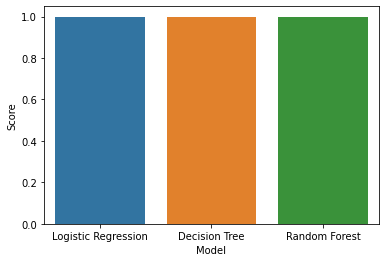

In [109]:
sns.barplot(data=score_df, x='Model', y='Score')

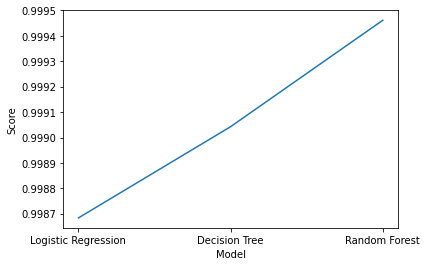

In [110]:
sns.lineplot(data=score_df, x='Model', y='Score')

In [111]:
print("The maximum score we got was through Random Forest Classifier that was", model_rf.score(x_test, y_test))

The maximum score we got was through Random Forest Classifier that was 0.9994614648157013
